# Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Sometimes we want to reduce dimensionality for visualization or for better modeling.

**Dimensionality reduction** exploits structure and correlation and allows us to work with a more compact representation of the data, ideally without losing information. 

In this lecture, we will discuss **principal component analysis (PCA)**, an algorithm for linear dimensionality reduction. PCA, proposed by Pearson (1901) and Hotelling (1933), has been around for more than 100 years and is still one of the most commonly used techniques for dimensionality reduction. It also inspires more advanced technique such as "autoencoders" in deep neural networks.

## Problem

In PCA, we are interested in finding projection $\mathbf{z}^{(i)} \in \mathbb{R}^{n'}$  of a sample $\mathbf{x}^{(i)} \in \mathbb{R}^{n}$  where $n' < n$.

To achieve that, we have to find the projection matrix $\mathbf{B}$:

$$\mathbf{z}^{(i)} = \mathbf{B}^\top \mathbf{x}^{(i)} \in \mathbb{R}^{n'}$$

or in a matrix form where $\mathbf{X} \in \mathbb{R}^{m \ \times \ n}$

$$ \mathbf{z} = \mathbf{XB} \in \mathbb{R}^{m \ \times \ n'}$$

where

$$\mathbf{B} \in \mathbb{R}^{n \ \times \ n'}$$

<!-- We assume that the columns of $\mathbf{B}$ are *orthonormal* so that $\mathbf{b}_i^\top \mathbf{b}_j = 0$ iff $i \neq j$ and $||\mathbf{b}_i|| = 1$.

**Examples**:  *orthogonal* vectors can be [1, 2], and [2, -1]; *orthonormal* vectors can be [1, 0], [0, 1].

**Why orthnormal**:  this would make sense later but the short answer is that we want to find the vectors that can project the original $\mathbf{x}$ into the most uncorrelated ways.  As for unit vector, it's because we simply want to project, not enlarge or make the vector smaller.  -->

## Approach

<img src = "figures/pca.gif" height="400">

PCA is a dimensionality reduction algorithm that **maximizes the variance** by finding a matrix $\mathbf{B}$.  To make everything simple, let's first look at just a single vector $\mathbf{b}_1 \in \mathbb{R}^{n}$ that maximizes the variance of $\mathbf{z}_1 \in \mathbb{R}^m$ which results from compressing the first feature vector $\mathbf{x}_1 \in \mathbb{R}^m$.  The variance of $\mathbf{z}_1$ is as follows:

$$\text{Var}(\mathbf{z}_1) = \frac{1}{m}\sum\limits_{i=1}^{m}\big(\mathbf{z}^{(i)}_1 - \mathbf{\mu_1}\big)^2 = \frac{1}{m}\sum\limits_{i=1}^{m}\big(\mathbf{z}^{(i)}_1\big)^2 \tag{A}$$

In (A), we assume **our data mean is zero**, which will makes thing very easy.  Note that centered data DOES NOT change the projection vector since the direction is the same.

Note that $\mathbf{z}^{(i)}_1$ is given by

$$\mathbf{z}^{(i)}_1 = \mathbf{b}_1^\top \mathbf{x}^{(i)} \tag{B}$$

We subsitute (B) into (A) yields:

$$\text{Var}(\mathbf{z}_1) = \frac{1}{m}\sum\limits_{i=1}^{m}\big( \mathbf{b}_1^\top \mathbf{x}^{(i)}\big)^2 = \frac{1}{m}\sum\limits_{i=1}^{m}\mathbf{b}_1^\top \mathbf{x}^{(i)}\mathbf{x}^{(i)\top}\mathbf{b}_1 \tag{C}$$

$$ =\mathbf{b}^\top_1\big(\frac{1}{m}\sum\limits_{i=1}^{m}\mathbf{x}^{(i)}\mathbf{x}^{(i)\top}\big)\mathbf{b}_1 = \mathbf{b}_1^\top \mathbf{S}\mathbf{b}_1 $$

where $\mathbf{S}$ is the data covariance matrix:

$$\mathbf{S} = \frac{1}{m}\sum\limits_{i=1}^{m} \mathbf{x}^{(i)} \mathbf{x}^{(i)}$$

or 

$$\mathbf{S} = \frac{1}{m}\mathbf{X}^\top \mathbf{X}$$

Note that in (C), we have used the fact that the dot product of two vectors is symmetric, i.e., $\mathbf{b}_1^\top \mathbf{x}^{(i)} = \mathbf{x}^{(i)\top}\mathbf{b}_1$.

Notice that arbitrarily increasing the magnitude of the vector $\mathbf{b}_1$ increases $\text{Var}(\mathbf{z}_1)$, that is, a vector $\mathbf{b}_1$ that is two times longer can result in $\text{Var}(\mathbf{z}_1)$ that is potentially four times larger. Therefore, we restrict all solutions to $\lVert \mathbf{b}_1\rVert^2 = 1$.  In layman terms, we want to find the **direction** of the projection vector that maximizes the variances, thus the **projection vector must be a unit vector**.

## Lagrange Method

Recall in SVM that the method of Lagrange multipliers allows us to turn a constrained optimization problem into an unconstrained one of the form.

$$\mathcal{L} = f(w) + \sum \alpha \cdot g(w) + \sum \beta \cdot h(w)$$ 

where $f(w)$ is the function we want to optimize, and $g(w)$ and $h(w)$ are the constraint function where $g(w) \leq 0$, $h(w) = 0$ and $\alpha \geq 0$.

Based on our problem, the constrained optimization problem is:

$$
\max_{\mathbf{b}_1} \mathbf{b}_1^\top \mathbf{S}\mathbf{b}_1
$$

$$
\text{subject to} \ \lVert \mathbf{b}_1\rVert^2 = 1
$$

Thus the Lagrangian $\mathcal{L}$

$$\mathcal{L}(\mathbf{b}_1, \beta) = \mathbf{b}_1^\top \mathbf{S}\mathbf{b}_1 + \beta(1 - \mathbf{b}^\top_1\mathbf{b}_1)$$

Note that $h(w) = 1 - \lVert\mathbf{b}_1\rVert^2 = 0 \quad \text{-->} \quad 1-\mathbf{b}^\top_1\mathbf{b}_1 = 0$;  in addition, we can ignore the $\sum$ because we do it in vector forms.

The partial derivatives of $\mathcal{L}$ with respect to $\mathbf{b}_1$ and $\beta$ are

$$\frac{\partial \mathcal{L}}{\partial \mathbf{b}_1} = 2\mathbf{b}_1^\top \mathbf{S} - 2\beta\mathbf{b}_1^\top$$

$$\frac{\partial \mathcal{L}}{\partial \beta} = 1 - \mathbf{b}_1^\top \mathbf{b}_1 $$

Setting these partial derivatives to 0 gives us

$$\mathbf{S}\mathbf{b}_1 = \beta\mathbf{b}_1 \tag{D}$$
$$\mathbf{b}^\top_1\mathbf{b}_1 = 1$$

Looking at this, we see that $\mathbf{b}_1$ is an eigenvector of the data covariance matrix $\mathbf{S}$, and the Lagrange multiplier $\beta$ plays the role of the corresponding eigenvalue.   We also see that $\mathbf{b}_1$ is a unit vector (length of 1).

Following this eigenvector property (D), we can rewrite our variance objective in (C) as

$$\text{Var}(\mathbf{z}_1) = \mathbf{b}^\top_1 \mathbf{S} \mathbf{b}_1 = \beta \mathbf{b}^\top_1\mathbf{b}_1 = \beta$$

Therefore, **to maximize the variance of the low-dimensional data, we choose the projection vector $\mathbf{b}_j$ associated with the largest eigenvalue of the data covariance matrix.** This eigenvector is called the first *principal component*. 

But let's stop a bit.  Do you remember what are eigenvectors and eigenvalues?

### Quick review of eigenvector and eigenvalue

First look at this picture:

<img src = "figures/Eigenvectors.gif" height = 400>

Here, the blue and purple vectors are eigenvectors of the stretching operation.  Eigenvalues are how much they got lengthen.

Formally, 

$$\mathbf{M} \mathbf{v} = \lambda \mathbf{v}$$

**Eigenvector**: Eigenvectors are vectors $\mathbf{v}$ that when multiplied by their corresponding matrix $\mathbf{M}$ only change by a real number constant $\lambda$.

**Eigenvalue**: This is $\lambda$ that tells you how much the arrow (eigenvector) gets stretched or squished, even when the direction does not change.

In the context of covariance matrix (i.e., $\mathbf{S}$), 

$$\mathbf{S}\mathbf{b}_1 = \beta\mathbf{b}_1$$

the **eigenvectors** (here is $\mathbf{b}$)  tell you the **primary** directions in which your data varies the most. The variance is informed by its corresponding **eigenvalues** (here is $\beta$).

## How to find eigenvectors

There are two ways to find eigenvectors: 1) Eigen decomposition and 2) Singular Value Decomposition.  Here we will use eigen decomposition.  You can look at another jupyter notebook for SVD approach.

## Eigen decomposition

Recall the covariance matrix

$$\mathbf{S} = \frac{1}{m}\mathbf{X}^\top \mathbf{X} \in \mathbb{R}^{n \times n}$$

According to eigen decomposition theorem, any squared matrix $\mathbf{A}$ can be factorized into:

$$ \mathbf{A} = \mathbf{Q}\Lambda\mathbf{Q}^\top $$

where $\mathbf{Q} \in \mathbb{R}^{n \times n}$ is a matrix of eigenvectors (each column is an eigenvector) and $\Lambda \in \mathbb{R}^{n \times n}$ is a diagonal matrix with eigenvalues $\beta_i$ in the decreasing order on the diagonal.  

For example:

$$
\mathbf{A} = 
\begin{bmatrix}
    0.68217761 & 0.23093475 \\
    0.23093475 & 0.09883179 \\
\end{bmatrix}
$$

Can be eigen decomposed to

$$
\mathbf{A} = 
\begin{bmatrix}
    0.68217761 & 0.23093475 \\
    0.23093475 & 0.09883179 \\
\end{bmatrix}
=
\underbrace{\begin{bmatrix}
    -0.94446029 &  0.32862557 \\
    -0.32862557 & -0.94446029 \\
\end{bmatrix}}_{\mathbf{Q}}

\underbrace{\begin{bmatrix}
    0.7625315 &  0 \\
    0 & 0.0184779 \\
\end{bmatrix}}_{\Lambda}

\underbrace{\begin{bmatrix}
    -0.94446029 & -0.32862557 \\
    0.32862557 & -0.94446029 \\
\end{bmatrix}}_{\mathbf{Q}^\top}

$$

Here is the code:

```python
    Q = np.array([[-0.94446029, 0.32862557], [-0.32862557, -0.94446029]])
    Q_inv = np.linalg.inv(Q)
    L = np.array([[0.7625315, 0], [0, 0.0184779]])
    Q @ L @ Q_inv
```
Similarly, since our covariance matrix $\mathbf{S}$ is a squared matrix, it can be decomposed to

$$ \mathbf{S} = \mathbf{Q}\Lambda\mathbf{Q}^\top $$

where $\mathbf{Q}$ and $\Lambda$ are the eigenvectors and eigenvalues respectively.

## Projection

Recall this formula:

$$ \mathbf{z} = \mathbf{XB} \in \mathbb{R}^{m \ \times \ n'}$$

Here, $\mathbf{B}$ is simply $\mathbf{Q}$, thus the new reduced data is

$$ \mathbf{z} = \mathbf{XQ} \in \mathbb{R}^{m \ \times \ n'} $$

Here, we take $n'$ columns of $\mathbf{Q} \in \mathbb{R}^{n \times n'}$ depending on how many columns we want to take. 

## Projecting it back?

Sometimes, we may be interested how much information is loss.  To do that we can first project the reduced data $\mathbf{Z}$ back to original dimensions $\hat{\mathbf{X}}$, and then calculate the change in variance.  But how do we project the reduced the data back?  This is trivial:

$$\hat{\mathbf{X}} = \underbrace{\mathbf{Z}}_{m \times \ n'} \quad \underbrace{\mathbf{Q}^\top}_{n' \times \ n} \in  \mathbb{R}^{m \times n}$$

## Scratch

1. Center the data $\mathbf{X}$
2. Find the covariance matrix of the centered $\mathbf{X}$
3. Find the eigenvectors and eigenvalues of the covariance matrix using eigen decomposition
4. Pick the eigenvectors with the $n'$ largest eigenvalues; we called them the $n'$ principal components where we can combine these eigenvectors into matrix and called it $\mathbf{B}$ to match our definition above.
5. Project $\mathbf{X}$ using the eigenvectors, i.e., $\mathbf{z} = \mathbf{X}\mathbf{B}$

(200, 2)


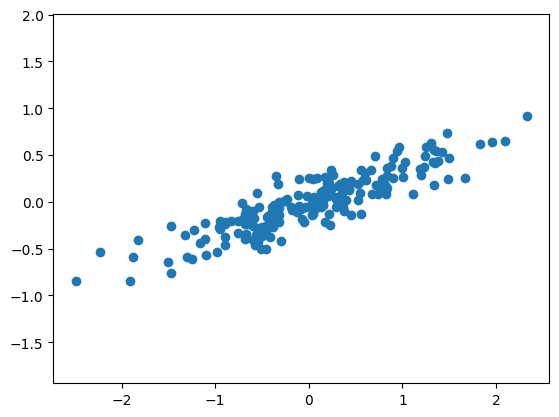

In [2]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

print(X.shape)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

def PCA(X, n_components=1):
    #1. center the data (center the data, not features, thus axis=0)
    mean = np.mean(X, axis=0)
    X = (X - mean)

    #2. find covariance
    #the reason we can X.T @ X right away since we already 
    #center the data)
    #did not really use this variable
    cov = (X.T @ X) / (X.shape[0] - 1)
    
    print("Covariance matrix: ", cov)
    
    #3. Then simply find the eigenvalues using np.linalg.eig 
    #by inputting the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
     
    print("Eigenvalue shape: ", eigenvalues.shape) #(n, )
    print("Eigenvectors shape: ", eigenvectors.shape) #(n, n)

    #4. Your n'th principal components will be your first n'th eigenvectors with highest eigenvalues
    ix = np.argsort(eigenvalues)[::-1] #sort them from biggest to smallest thus -1

    if(n_components > eigenvalues.shape[0]):
        raise Exception("You cannot have n_components more than number of features!")
    else:
        eigenvalues, eigenvectors = eigenvalues[ix], eigenvectors[:, ix]
        #get the first nth components
        eigenvalues, eigenvectors = eigenvalues[:n_components], eigenvectors[:,:n_components]

    #define how much variance is gained after n' component
    variance_explained_ratio = np.cumsum(eigenvalues)/np.sum(eigenvalues)

    #projected new vector
    #during projection, eigenvectors mush be arranged in columns
    projected_X = X @ eigenvectors
    
    #print all info
    # print("Variance explained_ratio: ", variance_explained_ratio) #first component got 97%
    print("Eigenvalues: ", eigenvalues)
    print("Eigenvectors (column-wise): ", eigenvectors)
    
    #return only n_components eigenvalues and vectors
    return eigenvalues, eigenvectors, mean, projected_X

#main code
eigenvalues, eigenvectors, mean, projected_X = PCA(X, n_components=2)

Covariance matrix:  [[0.68217761 0.23093475]
 [0.23093475 0.09883179]]
Eigenvalue shape:  (2,)
Eigenvectors shape:  (2, 2)
Eigenvalues:  [0.7625315 0.0184779]
Eigenvectors (column-wise):  [[-0.94446029  0.32862557]
 [-0.32862557 -0.94446029]]


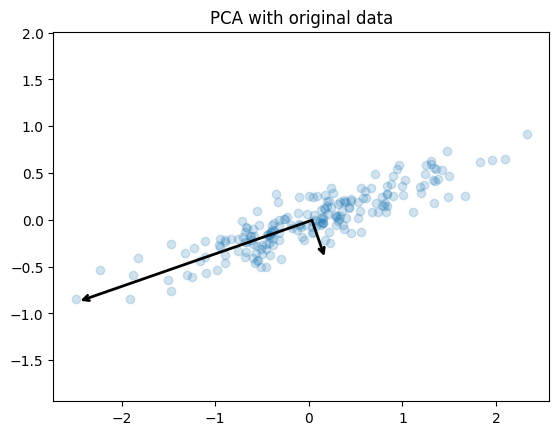

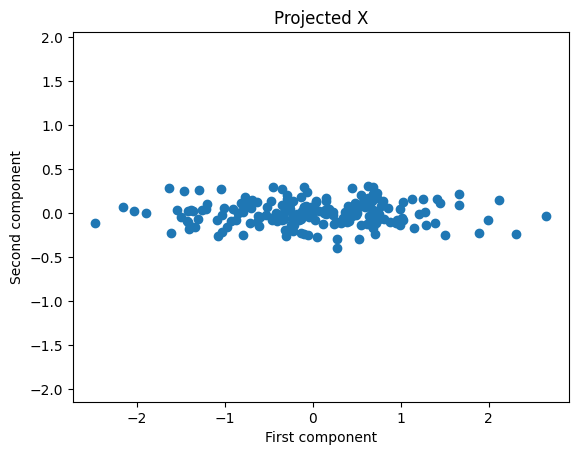

In [4]:
#copy code from the lectures to plot the eigen values and vectors
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()  #get current axis
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

#looking at the original graph with the loadings
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

#.T so each row is eigenvector, so we can loop
for length, vector in zip(eigenvalues, eigenvectors.T):
    #loadings = eigenvector * (unit size) * sqrt (eigenvalue)
    #https://stats.stackexchange.com/questions/143905/loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another
    v = vector  *  3 * np.sqrt(length)  #3 here so we can see in the plot, sqrt to convert variance to scale
    draw_vector(mean, mean + v)
plt.axis('equal')
plt.title('PCA with original data')

#projection
#you can see that lots of data in the second components is gone
plt.figure()
plt.scatter(projected_X[:, 0], projected_X[:, 1])
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("Projected X")
plt.axis('equal');

## 2. Sklearn

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data.

Consider the following 200 points:

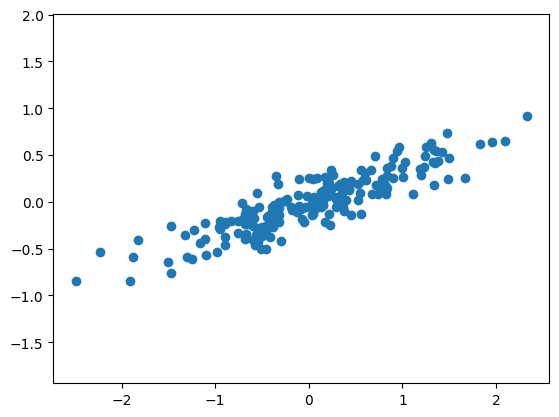

In [5]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');


Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

*The* fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [7]:
print("Eigenvectors: ", pca.components_)
print("Eigenvalues: ", pca.explained_variance_)
print("Mean: ", pca.mean_) #center point

Eigenvectors:  [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
Eigenvalues:  [0.7625315 0.0184779]
Mean:  [ 0.03351168 -0.00408072]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

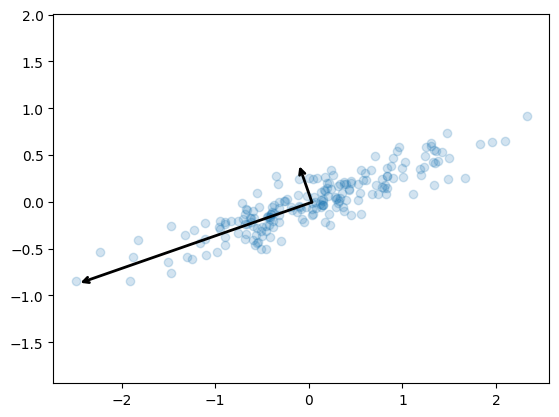

In [8]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()  #get current axis
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    #loadings = eigenvector * (unit size) * sqrt (eigenvalue)
    v = vector * 3 *  np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the "principal components" of the data.

### 3. PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [9]:
pca = PCA(n_components=1)  #you want to transform to 1D hence n_components =1
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

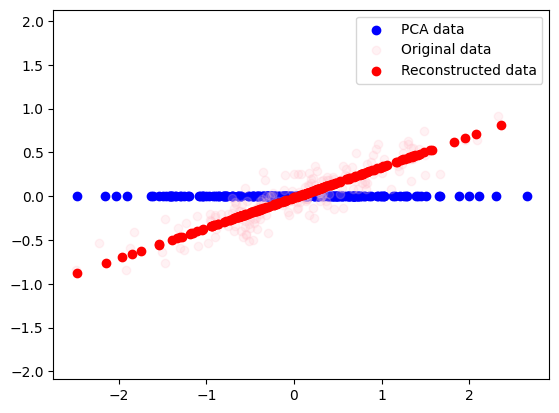

In [10]:
y = np.zeros(X_pca.shape[0])
plt.scatter(X_pca[:, 0], y, color = 'blue', label="PCA data")  #pca data

X_new = pca.inverse_transform(X_pca)  #inverse transform back
plt.scatter(X[:, 0], X[:, 1], color = "pink", alpha=0.2, label="Original data")  #original data
plt.scatter(X_new[:, 0], X_new[:, 1], color = 'red', label="Reconstructed data")
plt.axis('equal');
plt.legend()

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

### When to / not to use PCA?

Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines.
Given any high-dimensional dataset, we tend to start with PCA in order to visualize the relationship between points 

PCA's **primary weakness** is that it tends to be highly affected by outliers in the data, and its limitation to linear data.  For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.
Scikit-Learn contains a couple interesting variants on PCA, including ``IncrementalPCA`` and ``SparsePCA`` and ``KernelPCA``

## Workshop

1. Why do we want to reduce dimensionality of data?
2. In PCA, we want to find the projection matrix $\mathbf{B}$, what is the shape of $\mathbf{B}$?
3. How do we decide $n'$?
4. PCA is a algorithm try to maximize the variance of the reduced data.  What does that even mean, in layman terms?
5. According to $\frac{1}{m}\sum\limits_{i=1}^{m}\big(\mathbf{z}^{(i)}_1 - \mathbf{\mu_1}\big)^2 = \frac{1}{m}\sum\limits_{i=1}^{m}\big(\mathbf{z}^{(i)}_1\big)^2$, what justifies that simplification?
6. Why Chaky talks about Lagrange method?  What are $f(w)$ and $h(w)$?
7. After we maximize, we learn something very interesting about $\mathbf{b}$, and $\beta$.  What is that?
8. How many ways to find eigenvectors?
9. What is the shape of eigenvectors?
10. $\mathbf{Q}$ is a **matrix** of eigenvectors.  How do we know which eigenvector to choose?
11. Chaky taught about projecting the data back to the original space.  Why we want to do that?